### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'

In [6]:
import sys
sys.path.append(libPath)
import numpy as np
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

### Datafiles path

In [73]:
homogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/homogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-05_12-18-55grg60_zo/data_tf_disabled.pkl'
homogeneousLV15Comm15Path = '/home/mayank/ray_results/homogeneous-full-comm-LV15m-Comm-15m/PPO_v2i-v0_0_2019-11-05_19-37-35q9vbzp4w/data_tf_disabled.pkl'
heterogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/heterogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-06_01-29-19wd1ehb7g/data_tf_disabled.pkl'


# Homogeneous - Only LocalView

### Load data

In [4]:
homogeneousOnlyLocalView15mData = loadPKL(homogeneousOnlyLocalView15mPath)

In [5]:
homogeneousOnlyLocalView15mData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

### Agent Speed as function of time

In [21]:
agentSpeedEpisodes = {}
agentSpeedEpisodes['complete'] = []
agentSpeedEpisodes['uncomplete'] = []

totalEpisodes = 0
completeCount = 0
for data in homogeneousOnlyLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(homogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    if episodeLen == homogeneousOnlyLocalView15mData['max-episode-length']:
        completeCount += 1
        agentSpeedEpisodes['complete'].append(homogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    else:
        agentSpeedEpisodes['uncomplete'].append(homogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    
    totalEpisodes += 1

assert len(agentSpeedEpisodes['complete']) == completeCount

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)

Percentage of full episodes :  70.0


In [25]:
completeEpisodeSpeedData = np.array(agentSpeedEpisodes['complete']).transpose()
print(completeEpisodeSpeedData.shape)

(2400, 35)


In [26]:
completeEpisodeSpeedData = completeEpisodeSpeedData.mean(axis=1)
print(completeEpisodeSpeedData.shape)

(2400,)


### Average agent speed

In [41]:
homogOnlyLocalViewSpeed = np.array(agentSpeedEpisodes['complete']).sum(axis=1) / homogeneousOnlyLocalView15mData['max-episode-length']
homogOnlyLocalViewSpeed *= 3.6
homogOnlyLocalViewAvgSpeed, homogOnlyLocalViewSpeedStd = np.mean(homogOnlyLocalViewSpeed), np.std(homogOnlyLocalViewSpeed)

print(homogOnlyLocalViewAvgSpeed, homogOnlyLocalViewSpeedStd)


22.508775257142368 0.24259778453591724


# Homogeneous - Comm 15m + LV 15m

In [52]:
homogeneousComm15LV15Data = loadPKL(homogeneousLV15Comm15Path)

In [54]:
homogeneousComm15LV15Data.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

### Agent speed as function of time

In [55]:
agentSpeedEpisodesHomoFullComm = {}
agentSpeedEpisodesHomoFullComm['complete'] = []
agentSpeedEpisodesHomoFullComm['uncomplete'] = []

totalEpisodes = 0
completeCount = 0
for data in homogeneousComm15LV15Data['data']['0.4_0.4']:
    episodeLen = len(homogeneousComm15LV15Data['data']['0.4_0.4'][data]['speed'])
    if episodeLen == homogeneousComm15LV15Data['max-episode-length']:
        completeCount += 1
        agentSpeedEpisodesHomoFullComm['complete'].append(homogeneousComm15LV15Data['data']['0.4_0.4'][data]['speed'])
    else:
        agentSpeedEpisodesHomoFullComm['uncomplete'].append(homogeneousComm15LV15Data['data']['0.4_0.4'][data]['speed'])
    
    totalEpisodes += 1

assert len(agentSpeedEpisodesHomoFullComm['complete']) == completeCount

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)

Percentage of full episodes :  50.0


In [56]:
completeEpisodeSpeedDataHomoFullComm = np.array(agentSpeedEpisodesHomoFullComm['complete']).transpose()
print(completeEpisodeSpeedDataHomoFullComm.shape)

(2400, 25)


In [57]:
completeEpisodeSpeedDataHomoFullComm = completeEpisodeSpeedDataHomoFullComm.mean(axis=1)
print(completeEpisodeSpeedDataHomoFullComm.shape)

(2400,)


### Agent average speed

In [61]:
homogFullCommSpeed = np.array(agentSpeedEpisodesHomoFullComm['complete']).sum(axis=1) / homogeneousComm15LV15Data['max-episode-length']
homogFullCommSpeed *= 3.6
homogFullCommAvgSpeed, homogFullCommSpeedStd = np.mean(homogFullCommSpeed), np.std(homogFullCommSpeed)

print(homogFullCommAvgSpeed, homogFullCommSpeedStd)


26.334418559999634 1.0156392913581218


# Heterogeneous - Only Local View 15m

In [74]:
heterogeneousOnlyLocalView15mData = loadPKL(heterogeneousOnlyLocalView15mPath)

In [75]:
heterogeneousOnlyLocalView15mData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

### Agent speed as function of time

In [77]:
agentSpeedEpisodesHeteroLV15m = {}
agentSpeedEpisodesHeteroLV15m['complete'] = []
agentSpeedEpisodesHeteroLV15m['uncomplete'] = []

totalEpisodes = 0
completeCount = 0
for data in heterogeneousOnlyLocalView15mData['data']['0.4_0.4']:
    episodeLen = len(heterogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    print(episodeLen)
    if episodeLen == heterogeneousOnlyLocalView15mData['max-episode-length']:
        completeCount += 1
        agentSpeedEpisodesHeteroLV15m['complete'].append(heterogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    else:
        agentSpeedEpisodesHeteroLV15m['uncomplete'].append(heterogeneousOnlyLocalView15mData['data']['0.4_0.4'][data]['speed'])
    
    totalEpisodes += 1

assert len(agentSpeedEpisodesHeteroLV15m['complete']) == completeCount

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)

202
405
302
782
603
600
49
552
703
404
301
201
901
702
2003
502
1702
232
402
1004
2202
102
202
103
1701
402
203
202
402
302
1667
601
114
403
203
203
903
301
600
2400
335
701
300
403
101
401
102
603
2400
201
534
555
301
1001
103
501
664
203
103
1202
104
1104
602
146
302
301
202
601
100
103
503
302
203
101
502
102
301
302
201
58
578
302
1701
203
602
172
83
205
302
305
1100
102
902
200
103
202
2400
1003
609
1202
Percentage of full episodes :  3.0


In [ ]:
plt.plot()

# Plot all together

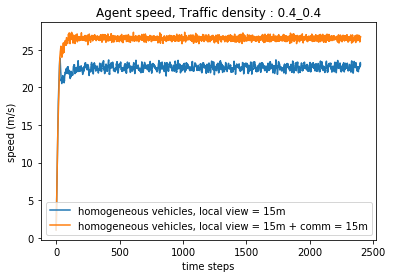

In [68]:
plt.plot(completeEpisodeSpeedData * 3.6, label='homogeneous vehicles, local view = 15m')
plt.plot(completeEpisodeSpeedDataHomoFullComm * 3.6, label='homogeneous vehicles, local view = 15m + comm = 15m')
plt.xlabel('time steps')
plt.ylabel('speed (m/s)')
plt.title('Agent speed, Traffic density : %s'%('0.4_0.4'))
plt.legend()

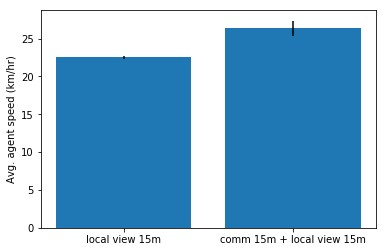

In [70]:
plt.bar([0, 1], [homogOnlyLocalViewAvgSpeed, homogFullCommAvgSpeed,], yerr=[homogOnlyLocalViewSpeedStd, homogFullCommSpeedStd])
plt.xticks(np.arange(0,2), ['local view 15m', 'comm 15m + local view 15m'])
plt.ylabel("Avg. agent speed (km/hr)")
plt.show()